# 분류 모델 - gradient boosting
 ## 데이터셋 - diabates
 1. 전처리/탐색적 자료분석
    * **당뇨병의 발병 유무와 연관 짓기**
    * **필요하면 시뮬레이션을 통해 결측치, 이상치 대체**
 2. 분류 모델 적용, 개선
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib

import koreanize_matplotlib
import seaborn as sns

origin_data=pd.read_csv("data/diabetes.csv")

In [2]:
data=origin_data.copy()

# **데이터 전처리**
 

## **결측치 확인 -> 없음 + 전부 숫자형인 것 확인**

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **전반적으로 확인**

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **변수 하나씩보기** 
 * 당뇨병 발병유무(outcome)에 맞춰 해석하기 -> outcome을 범주형 변수로 바꾸기
 * 모두 다 숫자형 변수임으로 corr() 확인 하기 -> gluconse, bmi, age 순으로 높고 bloodpressure가 상관관계 제일 낮다고 뜸
 * 하지만 corr의 값이 0에 가깝다는 것은 두 변수가 선형 관계가 아니라는 것이지 관계가 없다는 것은 아님 + 이상치가 있을 수 있으니 확인필요
 * 당뇨병 있는 그룹과 아닌 그룹으로 분리 -> data_yes와 data_no

In [9]:
print(data.columns) #변수명 확인
print(data.corr()) # 상관관계 확인
print("--------")
print("Outcome과 상관관계 확인")
data.corr().sort_values("Outcome",ascending=False)["Outcome"]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           I

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [10]:
data_yes=data[data["Outcome"]==1]
data_no=data[data["Outcome"]==0]
data["Outcome1"]=data["Outcome"].astype(str)

### **Pregnancies**
 * 상식적으로 13번 이상은 비현실적이라고 생각될 정도로 너무 많긴하지만 절대 나올 수 없는 수치는 아님
 * 나이와 강한 상관관계를 보임으로 후에 필요하면 그 **나이대의 평균**으로 대체
 * 가설 : 임신횟수는 당뇨 발병에 영향을 주는가?
   - 임신 경험이 한번 이상인 그룹과 아닌 그룹으로 나누고 당뇨 발병 여부 비교
   - 당뇨병 발병 유무에 따른 임신 횟수의 분포 확인

In [11]:
data["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: xlabel='Pregnancies'>

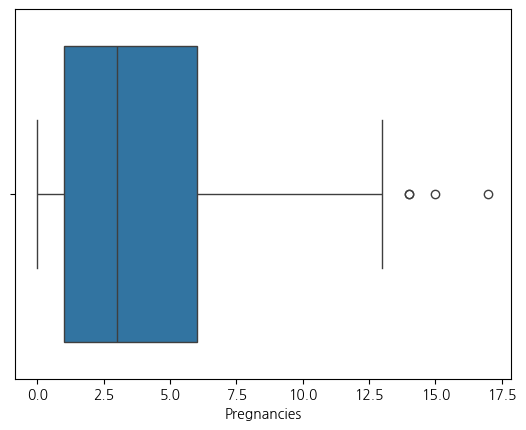

In [12]:
sns.boxplot(x="Pregnancies",data=data )

In [13]:
data[["Pregnancies","Age"]].corr() #강한 상관 관계를 갖는다고 볼 수 있다.

,Pregnancies,Age
Pregnancies,1.000000,0.544341
Age,0.544341,1.000000


<Axes: xlabel='Pregnancies', ylabel='count'>

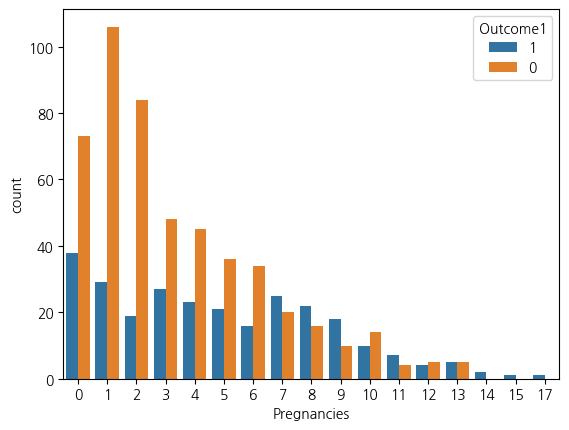

In [14]:
sns.countplot(x="Pregnancies",hue="Outcome1",data=data)

#### **6명까지는 당뇨병에 안걸리는 사람이 더 많다가 그 이후부터는 역전 되는 경향이 있다**
-임신 경험이 있는 그룹(pre) vs 임신경험이 없는 그룹(non_pre)로 나누기 

In [15]:
data_non_pre=data[data["Pregnancies"]==0]
data_pre=data[data["Pregnancies"]!=0]

In [16]:
print("임신 경험이 있는 사람들의 당뇨 발병 비율")
print(data_pre.value_counts("Outcome",normalize=True))
print("-------------------")
print("임신 경험이 없는 사람들의 당뇨 발병 비율")
print(data_non_pre.value_counts("Outcome",normalize=True))


임신 경험이 있는 사람들의 당뇨 발병 비율
Outcome
0    0.649924
1    0.350076
Name: proportion, dtype: float64
-------------------
임신 경험이 없는 사람들의 당뇨 발병 비율
Outcome
0    0.657658
1    0.342342
Name: proportion, dtype: float64


#### **임신 경험이 있건 없건 당뇨병의 발병 비율이 비슷하다 -> 임신 경험 유무 자체는 당뇨병 발병에 영향을 준다고 볼 수 없다**

In [17]:
!pip install seaborn --upgrade
!pip install pandas --upgrade


Pregnancies
1      21.481481
2      18.446602
3      36.000000
4      33.823529
5      36.842105
6      32.000000
7      55.555556
8      57.894737
9      64.285714
10     41.666667
11     63.636364
12     44.444444
13     50.000000
14    100.000000
15    100.000000
17    100.000000
Name: Outcome, dtype: float64


<Axes: xlabel='Pregnancies'>

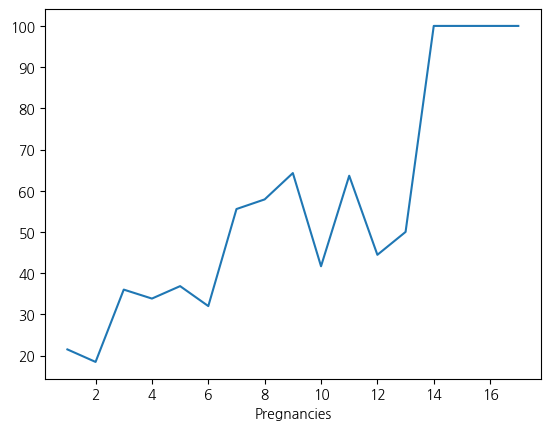

In [18]:
print(data_pre.groupby("Pregnancies")["Outcome"].mean()*100)
data_pre_rate=data_pre.groupby("Pregnancies")["Outcome"].mean()*100
sns.lineplot(x=data_pre_rate.index,y=data_pre_rate.values)

#### **완전 정비례 한다고 볼 순 없어도 일반적으로 임신 경험이 많다고 생각하는 7회 이상부터는 50%가 넘는 것으로 확인**

### **glucose**
- 2시간 동안의 경구 포도당 내성 검사(OGTT) 후 혈장 포도당 농도
- 사람 혈당이 0일 수 있나 -> 0을 제거하고 최솟값을 확인-> 어떻게 대체할지 생각해보기 -> 상관계수 확인
- glucose는 당뇨병 발병 유무와 꽤 높은 상관관계를 보여줌

In [19]:
data["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [20]:
data[data["Glucose"]!=0].describe() #glucose가 0인 값을 제외하면 최솟값이 44로 큰폭으로 증가 -> 0은 높은 확률로 잘못 기록된 것으로 생각-> 44는 그럴 수 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
print(data.corr()["Glucose"].sort_values(ascending=False))
print("----------")
print("0인 값을 제거하고 상관계수 확인")
print(data[data["Glucose"]!=0].corr()["Glucose"].sort_values(ascending=False))

Glucose                     1.000000
Outcome                     0.466581
Outcome1                    0.466581
Insulin                     0.331357
Age                         0.263514
BMI                         0.221071
BloodPressure               0.152590
DiabetesPedigreeFunction    0.137337
Pregnancies                 0.129459
SkinThickness               0.057328
Name: Glucose, dtype: float64
----------
0인 값을 제거하고 상관계수 확인
Glucose                     1.000000
Outcome                     0.494650
Outcome1                    0.494650
Insulin                     0.331550
Age                         0.267136
BMI                         0.235666
BloodPressure               0.158429
DiabetesPedigreeFunction    0.137246
Pregnancies                 0.128135
SkinThickness               0.075178
Name: Glucose, dtype: float64


#### glucose가 0인 사람들 살펴보기 -> 일단 상관관계가 매우 높은 outcome을 기준으로 나누고 살펴보자

In [22]:
data[data["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1
75,1,0,48,20,0,24.7,0.140,22,0,0
182,1,0,74,20,23,27.7,0.299,21,0,0
342,1,0,68,35,0,32.0,0.389,22,0,0
349,5,0,80,32,0,41.0,0.346,37,1,1
502,6,0,68,41,0,39.0,0.727,41,1,1


In [23]:
data.groupby("Outcome")["Glucose"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


#### **당뇨병 발병 유무에 따라 분포가 다르며 당뇨병이 없는쪽이 확실히 값이 작다 -> 당뇨병 발병 유무에 따라 결측치를 다른 값으로 대체**

Outcome1
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Glucose, dtype: object

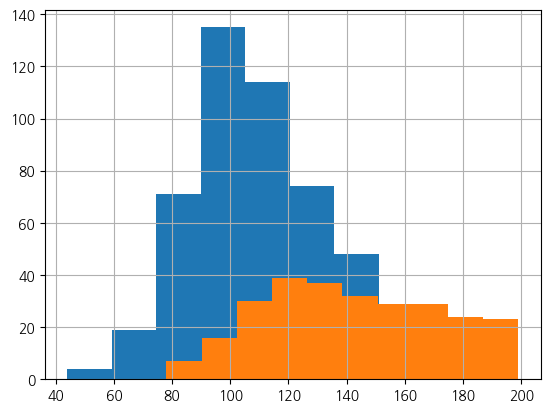

In [24]:
data[data["Glucose"]!=0].groupby("Outcome1")["Glucose"].hist()

#### 아이디어
 * 혈당내 포도당 수치는 당뇨병 유무 판단에 큰 영향을 미친다. 하지만 이 수치는 당뇨병 발병 유무에 상관 없이 0이 나올 수 없다.
 * 따라서 이 이상치는 신중히 판단해야 한다.
 * 당뇨병이 있는 그룹과 없는 그룹의 glucose 수치를 부스트랩을 통해 평균을 넣는다.
 * 가지고 있는 데이터의 히스토그램으로 분포를 확인해 보았을 때 당뇨병 발병 유무에 따라 분포 차이가 있으며 개수도 충분해 부스트랩은 분포를 잘 반영해줄 것이라 기대함.

In [25]:
data1=data.copy()
print(data1)
print("--------")
data1_glu_out0=data1[(data1["Outcome"]==0)&(data1["Glucose"]!=0)]["Glucose"] #당뇨병 없는 그룹의 glucose
data1_glu_out1=data1[(data1["Outcome"]==1)&(data1["Glucose"]!=0) ]["Glucose"] #당뇨병 있는 그룹의 glusoce
index= data1[data1["Glucose"]==0].index #glucose 수치가 0인 행의 인덱스
print(index) 
print("-----------")
for i in range(5):
    if data1.loc[index[i]]["Outcome"]==0: # 당뇨병이 발병 안했으면 그 그룹에서 부스트랩
        data1.loc[index[i],"Glucose"]=int(data1_glu_out0.sample(n=20,replace=True).mean()) #부스트랩
    else : # 당뇨병이 발병 했으면 그 그룹에서 부스트랩
        data1.loc[index[i],"Glucose"]=int(data1_glu_out1.sample(n=20,replace=True).mean()) #부스트랩
print("-----------")
print("확인")
for j in range(5):
    print(data1.loc[index[j]]["Glucose"]) #확인 잘됨

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Outcome1  
0                       0.627   50        1        1  
1

### **bloodpressure**
 - 확장기 혈압
 - 얘도 0이 있는데 사람 혈압이 0일 수는 없다 -> 0을 제외하면 24가 최소인데 이것도 매우 낮은 수치이다... 38미만은 이상치로 판단하고 다른 값으로 대체할지 고민

 - 아이디어
   1. 일단 bloodpressure 값이 있는(data_yes_blood) 그룹과 없는 그룹 (data_no_blood)으로 분리
   2. 혈압값이 없는 그룹에서 하나씩 뽑아서 outcome이 있는지 없는지 확인한다
   3. bmi와 age 순으로 bloodpressure와 상관계수가 높으며 일반적인 상식으로도 bmi와 나이는 혈압과 연관이 있다. 
   4. 그 다음 outcome이 같은 애들 중에서 bmi가 같은 애들의 혈압의 평균을 집어 넣는다
   5. 만약 bmi가 같은 애들이 없다면 age가 같은 애들의 혈압의 평균을 집어 넣는다
   6. let's go

In [26]:
data[data["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1
7,10,115,0,0,0,35.3,0.134,29,0,0
15,7,100,0,0,0,30.0,0.484,32,1,1
49,7,105,0,0,0,0.0,0.305,24,0,0
60,2,84,0,0,0,0.0,0.304,21,0,0
78,0,131,0,0,0,43.2,0.270,26,1,1
81,2,74,0,0,0,0.0,0.102,22,0,0
172,2,87,0,23,0,28.9,0.773,25,0,0
193,11,135,0,0,0,52.3,0.578,40,1,1
222,7,119,0,0,0,25.2,0.209,37,0,0
261,3,141,0,0,0,30.0,0.761,27,1,1


In [27]:

data_no_blood=data1[data1["BloodPressure"]==0]
data_yes_blood=data1[data1["BloodPressure"]!=0]
data_yes_blood_out1=data_yes_blood[data_yes_blood["Outcome"]==1]
data_yes_blood_out2=data_yes_blood[data_yes_blood["Outcome"]==0]


In [28]:
blood=[]
for i in range(len(data_no_blood)):
    blood=[]
    if data_no_blood.iloc[i]["Outcome"]==1: #당뇨가 있는 곳의 outcome 확인
        for j in range(len(data_yes_blood_out1)):
            if data_no_blood.iloc[i]["BMI"]==data_yes_blood_out1.iloc[j]["BMI"]: #BMI가 같은게 있나 확인
                blood.append(data_yes_blood_out1.iloc[j]["BloodPressure"])
            
        if len(blood) > 0 : #BMI가 같은게 있으면 blood 리스트의 길이가 0보다 클것이다
            data_no_blood.loc[data_no_blood.index[i], "BloodPressure"] = int(sum(blood) / len(blood))
        else : #만약 BMI가 같은걸 못찾았으면 Age에서 같은걸 찾자
            for j in range(len(data_yes_blood_out1)):
                if data_no_blood.iloc[0]["Age"]==data_yes_blood_out1.iloc[j]["Age"]: #age에서라도 찾자
                    blood.append(data_yes_blood_out1.iloc[j]["BloodPressure"]) 
            
            if len(blood) > 0 : 
                data_no_blood.loc[data_no_blood.index[i], "BloodPressure"] = int(sum(blood) / len(blood))

        
    elif data_no_blood.iloc[i]["Outcome"]==0: # 이번엔 당뇨가 없는 곳의 outcome 확인
        for j in range(len(data_yes_blood_out2)):
            if data_no_blood.iloc[i]["BMI"]==data_yes_blood_out2.iloc[j]["BMI"]: #여기도 bmi가 같은게 있나 확인
                blood.append(data_yes_blood_out2.iloc[j]["BloodPressure"])
            
        if len(blood) > 0 :
            data_no_blood.loc[data_no_blood.index[i], "BloodPressure"] = int(sum(blood) / len(blood))
        else :
            for j in range(len(data_yes_blood_out2)):
                if data_no_blood.iloc[0]["Age"]==data_yes_blood_out2.iloc[j]["Age"]: #여기도 age에서라도 찾자
                    blood.append(data_yes_blood_out2.iloc[j]["BloodPressure"])    
            if len(blood) > 0 :
                data_no_blood.loc[data_no_blood.index[i], "BloodPressure"] = int(sum(blood) / len(blood))


        

In [29]:
print(data_no_blood.head(10))
print("-----------")
print("첫번째 값 확인")
print("혈압이 원래 있던 그룹의 bmi가 35.3 이하인 사람들의 혈압 값은 74,70,60이고 혈압이 없던 사람은 68로 대체됨")
print(data_yes_blood[data_yes_blood["BMI"]==35.3])
print(str((74+70+60)/3) + " = (74+70+60)/3")
print("-----------")
print("두번째 값 확인")
print(data_yes_blood[data_yes_blood["BMI"]==30])
print("두번째로 혈압이 0이던 사람의 bmi는 30이고 당뇨병이 발병했다. 이와 똑같은 사람들의 혈압은 85임으로 값은 정확하다.")
print("값 이상없음")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115             68              0        0  35.3   
15             7      100             85              0        0  30.0   
49             7      105             73              0        0   0.0   
60             2       84             73              0        0   0.0   
78             0      131             73              0        0  43.2   
81             2       74             73              0        0   0.0   
172            2       87             74             23        0  28.9   
193           11      135             73              0        0  52.3   
222            7      119             68              0        0  25.2   
261            3      141             85              0        0  30.0   

     DiabetesPedigreeFunction  Age  Outcome Outcome1  
7                       0.134   29        0        0  
15                      0.484   32        1        1  
49                  

In [30]:
data_no_blood[data_no_blood["BloodPressure"]==0] #결측치 없음


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1


In [31]:
data1.loc[data_no_blood.index,"BloodPressure"]=data_no_blood["BloodPressure"] #data1으로 옮기기
data1[data1["BloodPressure"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1


In [32]:
print(data1["BloodPressure"].describe())


count    768.000000
mean      72.497396
std       12.218672
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [33]:
data[data["BloodPressure"]!=0]["BloodPressure"].sort_values().head(10)

597    24
18     30
125    30
599    38
4      40
741    44
575    44
576    44
80     44
346    46
Name: BloodPressure, dtype: int64

In [34]:
print(data.corr()["BloodPressure"].sort_values(ascending=False))
data1.corr()["BloodPressure"].sort_values(ascending=False)

BloodPressure               1.000000
BMI                         0.281805
Age                         0.239528
SkinThickness               0.207371
Glucose                     0.152590
Pregnancies                 0.141282
Insulin                     0.088933
Outcome                     0.065068
Outcome1                    0.065068
DiabetesPedigreeFunction    0.041265
Name: BloodPressure, dtype: float64


BloodPressure               1.000000
Age                         0.325386
Glucose                     0.222894
BMI                         0.221856
Pregnancies                 0.214644
Outcome                     0.179580
Outcome1                    0.179580
SkinThickness              -0.001103
DiabetesPedigreeFunction   -0.003674
Insulin                    -0.051592
Name: BloodPressure, dtype: float64

#### **혈압은 당뇨병 유무와 상관관계가 낮다고 나오지만 일반적인 상식으로 고혈압은 당뇨병과 연관이 있다. 따라서 혈압과 당뇨병 유무의 분포는 살펴볼 필요가 있다**

Outcome
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: BloodPressure, dtype: object

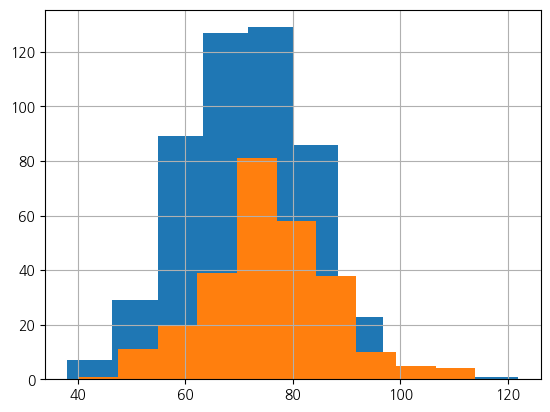

In [35]:
data1[data1["BloodPressure"]>37].groupby("Outcome")["BloodPressure"].hist() 

#### **대한고혈압 학회와 미국심장협회는 이완기 협압이 80 이상이면 고혈압 전기로 판단한다 -> 혈압이 80이상인 데이터셋만 다시 보자**


In [36]:
data_high_press=data1[data1["BloodPressure"]>=80]
print("전체 시험자")
print(data["Outcome"].value_counts(normalize=True))
print("----------")
print("80이상")
print(data_high_press["Outcome"].value_counts(normalize=True))
print("----------")
print("90이상")
print(data1[data1["BloodPressure"]>=90]["Outcome"].value_counts(normalize=True))
print("----------")
print("100이상")
data1[data1["BloodPressure"]>=100]["Outcome"].value_counts(normalize=True)

전체 시험자
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
----------
80이상
Outcome
0    0.546729
1    0.453271
Name: proportion, dtype: float64
----------
90이상
Outcome
0    0.508197
1    0.491803
Name: proportion, dtype: float64
----------
100이상


Outcome
1    0.5625
0    0.4375
Name: proportion, dtype: float64

#### **고혈압인 경우 혈압이 높아질수록 당뇨병 발병률이 높아지는건 맞다**
**이완기 혈압이 90 이상 -> 고혈압(1) , 이완기 혈압이 100 이상 => 고혈압(2)로 새로운 열 생성**

In [37]:
for i in range(len(data1)):
    if data1.loc[i,"BloodPressure"]>=100:
        data1.loc[i,"high_bp"]=2
    elif ((data1.loc[i,"BloodPressure"]>90) & (data1.loc[i,"BloodPressure"]<100)):
        data1.loc[i,"high_bp"]=1
    else :
        data1.loc[i,"high_bp"]=0

In [38]:
data1[data1["high_bp"]==1] #한번 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
9,8,125,96,0,0,0.0,0.232,54,1,1,1.0
10,4,110,92,0,0,37.6,0.191,30,0,0,1.0
24,11,143,94,33,146,36.6,0.254,51,1,1,1.0
29,5,117,92,0,0,34.1,0.337,38,0,0,1.0
33,6,92,92,0,0,19.9,0.188,28,0,0,1.0
42,7,106,92,18,0,22.7,0.235,48,0,0,1.0
67,2,109,92,0,0,42.7,0.845,54,0,0,1.0
102,0,125,96,0,0,22.5,0.262,21,0,0,1.0
115,4,146,92,0,0,31.2,0.539,61,1,1,1.0
187,1,128,98,41,58,32.0,1.321,33,1,1,1.0


<Axes: xlabel='BMI', ylabel='BloodPressure'>

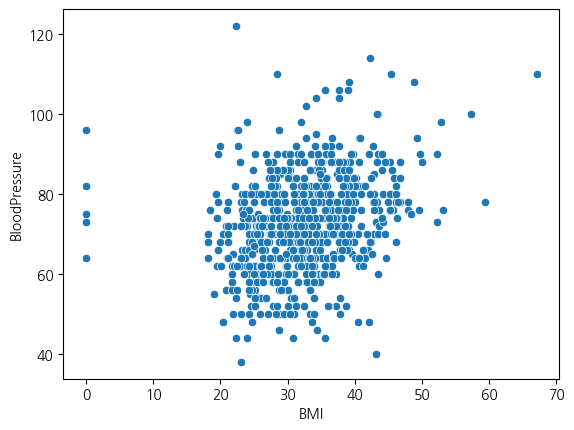

In [39]:
sns.scatterplot(x="BMI",y="BloodPressure",data=data1[data1["BloodPressure"]>37])


### **SkinThickness**
 * 삼두근 피부 두께
 * 여기도 0이 있는데 꽤 많다 -> 피부두께와 bmi가 큰 상관관계가 있는 것으로 보인다 -> bmi를 기반으로 이상치 채워 넣기

In [40]:
data1["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [41]:
data1[data1["SkinThickness"]==0].shape

(227, 11)

In [42]:
data1[data1["SkinThickness"]!=0].corr()["SkinThickness"].sort_values() 

high_bp                     0.089692
Pregnancies                 0.100239
DiabetesPedigreeFunction    0.115016
Insulin                     0.126423
Age                         0.166816
BloodPressure               0.226465
Glucose                     0.228544
Outcome                     0.259491
Outcome1                    0.259491
BMI                         0.631959
SkinThickness               1.000000
Name: SkinThickness, dtype: float64

#### **BMI와 높은 상관관계 있음 -> 결측치는 bmi에 기반해서 넣어야 하지 않을까**
1. 피부 두께는 bmi와 큰 상관 관계가 있으니까 피부 두께가 0인 사람들(data_no_skin)과 아닌 사람들(data_skin)로 나눈다
2. 피부 두께가 0인 사람들과 bmi가 같은 사람들을 data_skin에서 찾는다
3. 이 사람들의 피부 두께의 평균을 data_no_skin의 피부 두께로 넣는다
4. bmi가 0인사람들은 모두 피부두께가 23이다.

In [43]:
len(data1[(data1["SkinThickness"]==0) & (data1["BMI"]==0)])

9

In [44]:
data_no_skin=data1[data1["SkinThickness"]==0]
data_skin=data1[data1["SkinThickness"]!=0]


In [45]:
count_skin=[]

for i in range(len(data_no_skin)):
    count_skin=[]
    for j in range(len(data_skin)):
        if data_no_skin.iloc[i]["BMI"]==data_skin.iloc[j]["BMI"]:
                count_skin.append(data_skin.iloc[j]["SkinThickness"])
    if len(count_skin) > 0:
        data_no_skin.loc[data_no_skin.index[i],"SkinThickness"]=int( sum(count_skin)/(len(count_skin)) )
    
        
            

In [46]:
print(data_no_skin["SkinThickness"].head(20))
len(data_no_skin[data_no_skin["SkinThickness"]==0])

2      0
5     19
7     40
9     23
10    42
11    32
12    20
15    22
17    27
21    29
22    36
26    40
29    30
33     0
36    33
41     0
44    25
46    24
49    23
58    48
Name: SkinThickness, dtype: int64


32

#### **채워지지 않은 결측치가 32개 있다. **
**내림한 BMI가 같은 사람의 SkinThickness로 채워주자**

In [47]:
data1.loc[data_no_skin.index,"SkinThickness"]=data_no_skin["SkinThickness"]

In [48]:
data1[data1["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
2,8,183,64,0,0,23.3,0.672,32,1,1,0.0
33,6,92,92,0,0,19.9,0.188,28,0,0,1.0
41,7,133,84,0,0,40.2,0.696,37,0,0,0.0
67,2,109,92,0,0,42.7,0.845,54,0,0,1.0
76,7,62,78,0,0,32.6,0.391,41,0,0,0.0
78,0,131,73,0,0,43.2,0.270,26,1,1,0.0
84,5,137,108,0,0,48.8,0.227,37,1,1,2.0
90,1,80,55,0,0,19.1,0.258,21,0,0,0.0
104,2,85,65,0,0,39.6,0.930,27,0,0,0.0
151,4,114,65,0,0,21.9,0.432,37,0,0,0.0


In [49]:
data_no_skin2=data1[data1["SkinThickness"]==0]
data_yes_skin2=data1[data1["SkinThickness"]!=0]

count_skin=[]

for i in range(len(data_no_skin2)):
    count_skin=[]
    for j in range(len(data_yes_skin2)):
        if int(data_no_skin2.iloc[i]["BMI"])==int(data_yes_skin2.iloc[j]["BMI"]): #int를 씌워 버림한 값이 같은게 있나 봐보자
                count_skin.append(data_yes_skin2.iloc[j]["SkinThickness"])
    if len(count_skin) > 0:
        data_no_skin2.loc[data_no_skin2.index[i],"SkinThickness"]=int( sum(count_skin)/(len(count_skin)) )

In [50]:
data_no_skin2[data_no_skin2["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
84,5,137,108,0,0,48.8,0.227,37,1,1,2.0
378,4,156,75,0,0,48.3,0.238,32,1,1,0.0


#### 이렇게 하니까 2개가 남았다 이번에 bmi가 49 근처에 있는게 있나 봐보고 얘네의 평균을 넣어주자


In [51]:
data_yes_skin2[(data_yes_skin2["BMI"]<5) & (data_yes_skin2["BMI"]>48)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp


In [52]:
data_no_skin2.loc[84,"SkinThickness"]=42
data_no_skin2.loc[378,"SkinThickness"]=42
data_no_skin2[data_no_skin2["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp


In [53]:
data1.loc[data_no_skin2.index,"SkinThickness"]=data_no_skin2["SkinThickness"]

In [54]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,high_bp
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.660156,72.497396,28.43099,79.799479,31.992578,0.471876,33.240885,0.348958,0.071615
std,3.369578,30.465709,12.218672,9.92359,115.244002,7.884160,0.331329,11.760232,0.476951,0.329080
min,0.000000,44.000000,24.000000,7.00000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,22.00000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,28.00000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,141.000000,80.000000,35.00000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000


#### 값이 맞나 확인

In [55]:
data_no_skin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
2,8,183,64,0,0,23.3,0.672,32,1,1,0.0
5,5,116,74,19,0,25.6,0.201,30,0,0,0.0
7,10,115,68,40,0,35.3,0.134,29,0,0,0.0
9,8,125,96,23,0,0.0,0.232,54,1,1,1.0
10,4,110,92,42,0,37.6,0.191,30,0,0,1.0


In [56]:
data[data["BMI"]==25.6] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1
5,5,116,74,0,0,25.6,0.201,30,0,0
242,3,139,54,0,0,25.6,0.402,22,1,1
325,1,157,72,21,168,25.6,0.123,24,0,0
433,2,139,75,0,0,25.6,0.167,29,0,0
488,4,99,72,17,0,25.6,0.294,28,0,0
514,3,99,54,19,86,25.6,0.154,24,0,0


In [57]:
(21+17+19)/3

19.0

In [58]:
data[data["BMI"]==35.3] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1
7,10,115,0,0,0,35.3,0.134,29,0,0
358,12,88,74,40,54,35.3,0.378,48,0,0
462,8,74,70,40,49,35.3,0.705,39,0,0
677,0,93,60,0,0,35.3,0.263,25,0,0


In [59]:
print("(40+40)/2==data_no_skin.iloc[2][SkinThickness]")
(40+40)/2==data_no_skin.iloc[2]["SkinThickness"]

(40+40)/2==data_no_skin.iloc[2][SkinThickness]


True

In [60]:
data1[data1["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp


#### **확인 완료! -> 결측치를 227개 모두 처리**

Outcome
0    26.698000
1    31.664179
Name: SkinThickness, dtype: float64


Outcome
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: SkinThickness, dtype: object

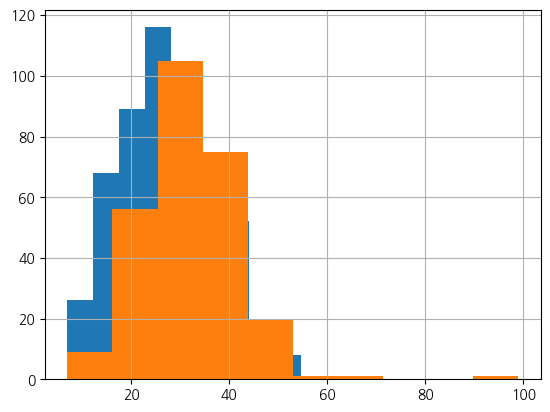

In [61]:
print(data1.groupby("Outcome")["SkinThickness"].mean())
data1.groupby("Outcome")["SkinThickness"].hist()

#### **당뇨병 있는 그룹이 피부 두께가 더 높긴하다**

### **insuline**
 * 인슐린 분비량은 당뇨병과 높은 관련이 있다 -> 이게 매우 낮을 경우 1형 당뇨병, 매우 높을경우 2형 당뇨병이다
 * 따라서 만약 인슐린 농도값이 0인데 당뇨병 발병x -> 이건 이상치
 * **하지만 인슐린 농도값이 0인 당뇨병 발병o -> 이건 당뇨병에 의해서 그럴 수 있다. 이렇게 인슐린이 아예 안나오거나 인슐린이 몸에서 제 기능을 못해 이런 결과가 나오는 사람을 당뇨병이라고 한다.**
 * **따라서 당뇨병이 있는 사람의 어떠한 수치도 이상치로 처리하지 않는게 타당하다 판단**
 * 그렇다면 당뇨병이 없는 환자의 "0"은 어떻게 처리할 것인가? -> 부스트랩
 * 앞에서 대규모로 처리한 혈압, 삼두근 두께와 다르게 인슐린 농도는 **당뇨병 발병 유무에 직접적인 영향을 끼친다고 생각하기 때문에 당뇨병의 발병 유무에 따라 사람들의 인슐린 농도에서 부스트랩으로 처리**하겠습니다.
 * 부스트랩은 표본의 개수가 너무 적지 않다면 모집단의 분포를 잘 반영합니다. 따라서 당뇨병이 발병하지 않은 집단의 인슐린 수치가 0인 경우는 부스트랩으로 처리하겠습니다.

In [62]:
print(data1["Insulin"].describe())
print(data1[(data1["Insulin"]>0) & (data1["Outcome"]==0)].sort_values(by="Insulin").tail(20))
data1[(data1["Insulin"]>0) & (data1["Outcome"]==0)].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
144            4      154             62             31      284  32.8   
162            0      114             80             34      285  44.2   
713            0      134             58             20      291  26.4   
364            4      147             74             25      293  34.9   
412            1      143             84             23      310  42.4   
139            5      105             72             29      325  36.9   
519            6      129             90              7      326  19.6   
574            1      143             86             30      330  30.1   
707            2      127             46             21      335  34.4   
54             7      150             66             42      342  34.7

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,high_bp
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.000000
mean,2.704545,111.416667,68.969697,27.208333,130.287879,31.615152,0.476280,28.291667,0.0,0.026515
std,2.615364,24.560019,11.855556,10.407211,102.482237,7.049650,0.308198,8.977484,0.0,0.220735
min,0.000000,56.000000,24.000000,7.000000,15.000000,0.000000,0.085000,21.000000,0.0,0.000000
25%,1.000000,94.000000,60.000000,18.750000,66.000000,26.075000,0.261000,22.000000,0.0,0.000000
50%,2.000000,107.500000,70.000000,27.000000,102.500000,31.200000,0.413500,25.000000,0.0,0.000000
75%,4.000000,126.000000,76.000000,34.000000,161.250000,36.100000,0.626750,30.000000,0.0,0.000000
max,13.000000,197.000000,106.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0,2.000000


In [63]:
data1[(data1["Insulin"]==0) & (data1["Outcome"]==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
5,5,116,74,19,0,25.6,0.201,30,0,0,0.0
7,10,115,68,40,0,35.3,0.134,29,0,0,0.0
10,4,110,92,42,0,37.6,0.191,30,0,0,1.0
12,10,139,80,20,0,27.1,1.441,57,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0,0,0.0
758,1,106,76,29,0,37.5,0.197,26,0,0,0.0
762,9,89,62,11,0,22.5,0.142,33,0,0,0.0
764,2,122,70,27,0,36.8,0.340,27,0,0,0.0


In [64]:
data1[(data1["Insulin"]<14) & (data1["Outcome"]==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
0,6,148,72,35,0,33.6,0.627,50,1,1,0.0
2,8,183,64,16,0,23.3,0.672,32,1,1,0.0
9,8,125,96,23,0,0.0,0.232,54,1,1,1.0
11,10,168,74,32,0,38.0,0.537,34,1,1,0.0
15,7,100,85,22,0,30.0,0.484,32,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1,1,0.0
757,0,123,72,37,0,36.3,0.258,52,1,1,0.0
759,6,190,92,35,0,35.5,0.278,66,1,1,1.0
761,9,170,74,31,0,44.0,0.403,43,1,1,0.0


In [65]:
data_in=data1[(data1["Insulin"]!=0) & (data1["Outcome"]==0) & (data1["Insulin"]<200)] #인슐린이 0이 아니고 당뇨병이 발병하지 않은 집단 
data_no_in=data1[(data1["Insulin"]==0) & (data1["Outcome"]==0)] #인슐린이 0이고 당뇨병이 발병하지 않은 집단

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   236.000000  236.000000     236.000000     236.000000  236.000000   
mean      3.961864  109.720339      73.042373      26.127119   96.525424   
std       3.291935   24.896000      11.787764       8.857786    9.424470   
min       0.000000   44.000000      44.000000       8.000000   71.000000   
25%       1.000000   92.000000      65.000000      20.000000   90.000000   
50%       3.000000  107.000000      72.000000      25.000000   96.000000   
75%       6.000000  123.250000      80.000000      32.000000  103.250000   
max      13.000000  194.000000     122.000000      54.000000  122.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome     high_bp  
count  236.000000                236.000000  236.000000    236.0  236.000000  
mean    28.837712                  0.377665   34.432203      0.0    0.084746  
std      8.115154                  0.280148   13.374462      0.0    0.334569  

<Axes: >

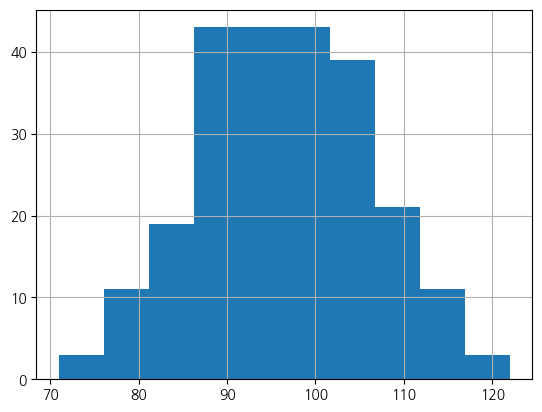

In [66]:
for i in range(len(data_no_in)):
    boost_in=data_in["Insulin"].sample(n=20,replace=True).mean() #부스트랩
    data_no_in.loc[data_no_in.index[i],"Insulin"]=int(boost_in) 
print(data_no_in.describe())
data_no_in["Insulin"].hist() #대부분 정상 수치 안에 있긴 하지만 사실 분포가 썩 마음에 들지 않아 후에 조금 더 왼쪽으로 치우친 코시 분포나 분산을 늘린 분포로 대체 해볼것을 고려
# 이 값들 외에 다른 값들도 필요하다고 생각이 들면 보정을 해주겠지만 인슐린 수치가 당뇨병에 대한 절대적인 요인이라고 볼수는 없기에 일단 보류 하겠습니다.

count    500.000000
mean     114.352000
std       76.563202
min       15.000000
25%       84.000000
50%       97.000000
75%      112.000000
max      744.000000
Name: Insulin, dtype: float64


<Axes: >

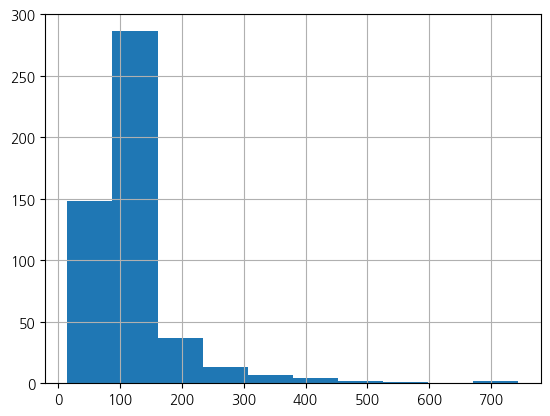

In [67]:
data1.loc[data_no_in.index,"Insulin" ]= data_no_in["Insulin"]
print(data1[data1["Outcome"]==0]["Insulin"].describe()) #값 잘 들어감
data1[data1["Outcome"]==0]["Insulin"].hist()


Axes(0.125,0.11;0.775x0.77)


<Axes: >

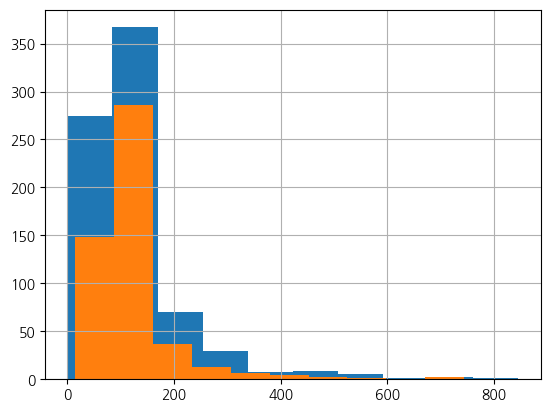

In [68]:
print(data1["Insulin"].hist())
data1[data1["Outcome"]==0]["Insulin"].hist()


### **BMI**
 * 사람 bmi가 10 이하인건 비현실적이다. 하지만 다행이도 0인 수치 다음으로 가장 낮은 값은 18.2로 정상적인 값이다.
 * bmi가 0인 사람들은 skinthickness가 같은 사람들의 bmi 값을 넣어주려고 한다. 그런데 이 사람들이 많아 outcome여부로 분류한 후 bootstrap을 통해 10명씩 뽑아 평균을 넣어줌
 * 개수가 20개씩으로 충분함으로 부스트랩이 더 적합하며 분포를 반영하기에도 좋다고 판단

In [69]:
data1["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [70]:
data1[data1["BMI"]<20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
9,8,125,96,23,0,0.0,0.232,54,1,1,1.0
33,6,92,92,12,95,19.9,0.188,28,0,0,1.0
49,7,105,73,23,97,0.0,0.305,24,0,0,0.0
50,1,103,80,11,82,19.4,0.491,22,0,0,0.0
60,2,84,73,23,88,0.0,0.304,21,0,0,0.0
68,1,95,66,13,38,19.6,0.334,25,0,0,0.0
81,2,74,73,23,108,0.0,0.102,22,0,0,0.0
90,1,80,55,12,84,19.1,0.258,21,0,0,0.0
145,0,102,75,23,107,0.0,0.572,21,0,0,0.0
239,0,104,76,17,82,18.4,0.582,27,0,0,0.0


In [71]:
data1[data1["BMI"]==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
9,8,125,96,23,0,0.0,0.232,54,1,1,1.0
49,7,105,73,23,97,0.0,0.305,24,0,0,0.0
60,2,84,73,23,88,0.0,0.304,21,0,0,0.0
81,2,74,73,23,108,0.0,0.102,22,0,0,0.0
145,0,102,75,23,107,0.0,0.572,21,0,0,0.0
371,0,118,64,23,89,0.0,1.731,21,0,0,0.0
426,0,94,73,23,89,0.0,0.256,25,0,0,0.0
494,3,80,73,23,104,0.0,0.174,22,0,0,0.0
522,6,114,73,23,95,0.0,0.189,26,0,0,0.0
684,5,136,82,23,98,0.0,0.640,69,0,0,0.0


In [72]:
data1[(data1["BloodPressure"]==73)&(data1["BMI"]!=0)]
data1[(data1["SkinThickness"]==23)&(data1["BMI"]!=0)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
13,1,189,60,23,846,30.1,0.398,59,1,1,0.0
118,4,97,60,23,89,28.2,0.443,22,0,0,0.0
143,10,108,66,23,0,32.4,0.272,42,1,1,0.0
163,2,100,64,23,99,29.7,0.368,21,0,0,0.0
171,6,134,70,23,130,35.4,0.542,29,1,1,0.0
172,2,87,74,23,81,28.9,0.773,25,0,0,0.0
192,7,159,66,23,0,30.4,0.383,36,1,1,0.0
277,0,104,64,23,116,27.8,0.454,23,0,0,0.0
283,7,161,86,23,0,30.4,0.165,47,1,1,0.0


In [73]:
data_no_bmi=data1[data1["BMI"]==0]
data_yes_bmi=data1[(data1["SkinThickness"]==23) & (data1["BMI"]!=0) ] # 피부 두께가 같은 사람 중 bmi가 0인 아닌 사람들
data_yes_bmi_out0=data_yes_bmi[data_yes_bmi["Outcome"]==0] # 이젠 outcome을 기준으로 분류
data_yes_bmi_out1=data_yes_bmi[data_yes_bmi["Outcome"]==1]
print(len(data_yes_bmi_out0),len(data_yes_bmi_out0) ) #개수가 충분함 -> 부스트랩 이용

20 20


In [74]:
bmi0=data_yes_bmi_out0["BMI"]
bmi1=data_yes_bmi_out1["BMI"]




In [75]:
bmi0=data_yes_bmi_out0["BMI"]
bmi1=data_yes_bmi_out1["BMI"]

for i in range(len(data_no_bmi)):
    if data_no_bmi.iloc[i]["Outcome"]==0: #outcome 판단
        data_no_bmi.loc[data_no_bmi.index[i],"BMI"]=bmi0.sample(n=10,replace=True).mean() #부스트랩
    elif data_no_bmi.iloc[i]["Outcome"]==1:
        data_no_bmi.loc[data_no_bmi.index[i],"BMI"]=bmi1.sample(n=10,replace=True).mean() #부스트랩
    

In [76]:
data_no_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
9,8,125,96,23,0,29.93,0.232,54,1,1,1.0
49,7,105,73,23,97,32.74,0.305,24,0,0,0.0
60,2,84,73,23,88,30.12,0.304,21,0,0,0.0
81,2,74,73,23,108,30.38,0.102,22,0,0,0.0
145,0,102,75,23,107,31.17,0.572,21,0,0,0.0
371,0,118,64,23,89,30.75,1.731,21,0,0,0.0
426,0,94,73,23,89,31.76,0.256,25,0,0,0.0
494,3,80,73,23,104,31.92,0.174,22,0,0,0.0
522,6,114,73,23,95,28.10,0.189,26,0,0,0.0
684,5,136,82,23,98,30.84,0.640,69,0,0,0.0


In [77]:
data1.loc[data_no_bmi.index,"BMI"]=data_no_bmi["BMI"]
data1["BMI"].describe()

count    768.000000
mean      32.433190
std        6.879503
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [78]:
data1.loc[data1["BMI"].sort_values(ascending=False).head(10).index,] # BMI가 높은 사람들을 살펴보았는데 혈압도 높고 그냥 많이 비만인 사람들이지 않을까... 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome1,high_bp
177,0,129,110,46,130,67.1,0.319,26,1,1,2.0
445,0,180,78,63,14,59.4,2.420,25,1,1,0.0
673,3,123,100,35,240,57.3,0.880,22,0,0,2.0
125,1,88,30,42,99,55.0,0.496,26,1,1,0.0
120,0,162,76,56,100,53.2,0.759,25,1,1,0.0
303,5,115,98,33,0,52.9,0.209,28,1,1,1.0
193,11,135,73,33,0,52.3,0.578,40,1,1,0.0
247,0,165,90,33,680,52.3,0.427,23,0,0,0.0
155,7,152,88,44,0,50.0,0.337,36,1,1,0.0
99,1,122,90,51,220,49.7,0.325,31,1,1,0.0


당뇨병 발병 유무에 따른 bmi 평균 확인
Outcome
0    30.859760
1    35.368694
Name: BMI, dtype: float64
Axes(0.125,0.11;0.775x0.77)


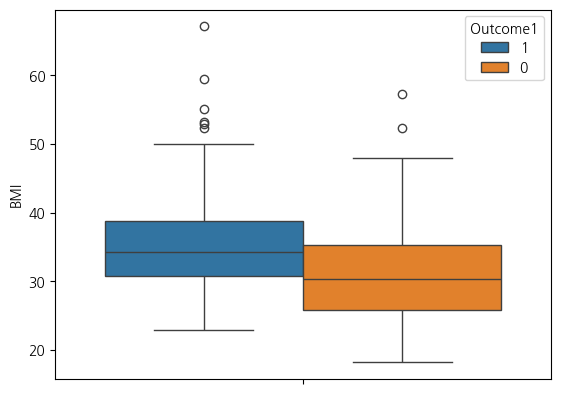

In [79]:
print("당뇨병 발병 유무에 따른 bmi 평균 확인")
print(data1.groupby("Outcome")["BMI"].mean())
print(sns.boxplot(y="BMI",hue="Outcome1",data=data1))


Outcome1
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: BMI, dtype: object

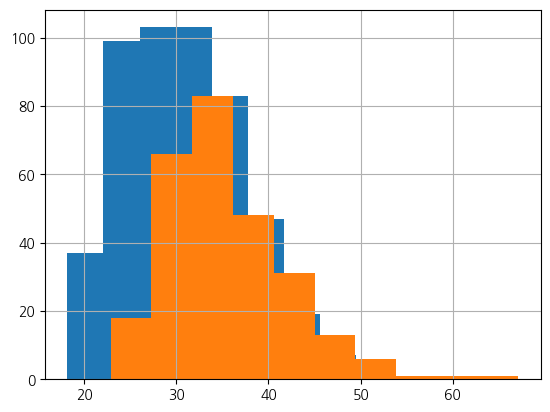

In [80]:
data1.groupby("Outcome1")["BMI"].hist()

#### **확실히 당뇨병 있는 그룹이 평균적인 분포도 오른쪽으로 치우쳐져 있고 값이 이상하게 높은 것도 많음**

### **DiabetesPedigreeFunction**
 * 가족중 당뇨병 병력이 있는 사람의 수치로 해석
 * 임신 횟수와 관련이 있을까? 근데 가족력은 자신보다 윗세대의 데이터고 임신 횟수는 자기 보다 아랫 세대의 데이터인데 별 상관없을거 같음

In [81]:
data1["DiabetesPedigreeFunction"].describe()  

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [82]:
data1.groupby("Outcome")["DiabetesPedigreeFunction"].mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

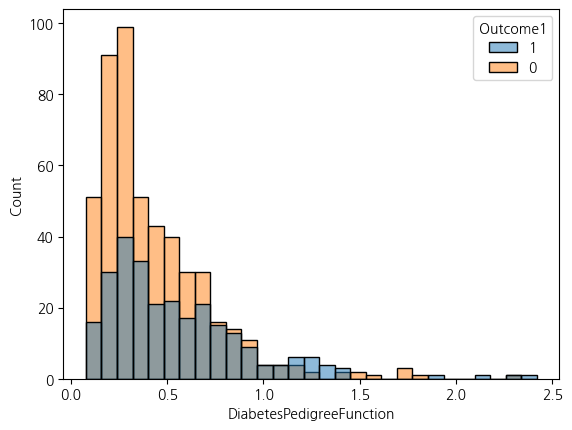

In [83]:
sns.histplot(x="DiabetesPedigreeFunction",hue="Outcome1",data=data1)

#### 이것도 임신횟수와 마찬가지로 특정 수치 이상은 높은 비율을 보임. 따로 전처리는 해줄 필요 없을 것 같음

### **Age**

In [84]:
data1["Age"].describe() #이상치 없음 

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

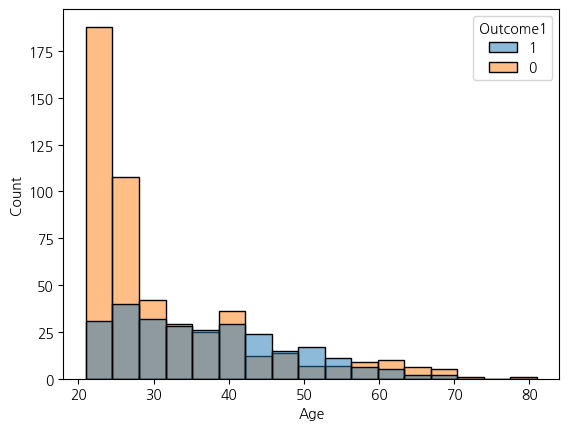

In [85]:
print(data1.groupby("Outcome")["Age"].mean())
sns.histplot(x="Age",hue="Outcome1",data=data1)

#### 확실히 나이가 많아질수록 당뇨병 비율이 증가함 이것도 따로 전처리 해줄 필요는 없을 것 같음

## gradient boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:

data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,high_bp
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.660156,72.497396,28.43099,109.460938,32.433190,0.471876,33.240885,0.348958,0.071615
std,3.369578,30.465709,12.218672,9.92359,102.733404,6.879503,0.331329,11.760232,0.476951,0.329080
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,22.00000,56.000000,27.500000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,28.00000,95.000000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,141.000000,80.000000,35.00000,127.250000,36.600000,0.626250,41.000000,1.000000,0.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000


In [88]:
y=data1[data1.columns[[9]]]
y
X=data1.drop(columns=data1.columns[[8,9]])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,high_bp
0,6,148,72,35,0,33.6,0.627,50,0.0
1,1,85,66,29,99,26.6,0.351,31,0.0
2,8,183,64,16,0,23.3,0.672,32,0.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,0.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0.0
764,2,122,70,27,82,36.8,0.340,27,0.0
765,5,121,72,23,112,26.2,0.245,30,0.0
766,1,126,60,27,0,30.1,0.349,47,0.0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.to_numpy().ravel()
# 모델 생성 및 학습
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=2,subsample=0.8, random_state=42)
gb.fit(X_train, y_train)

# 예측 및 평가
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8961038961038961


In [90]:
train_acc = accuracy_score(y_train, gb.predict(X_train))
test_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("둘의 차이가 이정도라면 과적합이라고 보기는 힘들지 않을까 싶습니다")

Train Accuracy: 0.9007
Test Accuracy: 0.8961
둘의 차이가 이정도라면 과적합이라고 보기는 힘들지 않을까 싶습니다


#### **grid search로 최적의 hyper parameter 찾아보기**

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8925229908036785


#### 트리 깊이를 4로 하면 너무 과적합이 나올 것 같다.

### 표준화 해보기

In [92]:

from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.to_numpy().ravel()
# 모델 생성 및 학습
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=2,subsample=0.8, random_state=42)
gb.fit(X_train, y_train)

# 예측 및 평가
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8701298701298701


#### 별 차이가 없다

In [94]:
### XG boost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y_train = y_train.astype(int)
y_test = y_test.astype(int)
# 모델 생성 및 학습
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.01, max_depth=2,  eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.8636363636363636


In [95]:
train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
test_acc = accuracy_score(y_test, xgb_model.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8990
Test Accuracy: 0.8636


#### feature importance

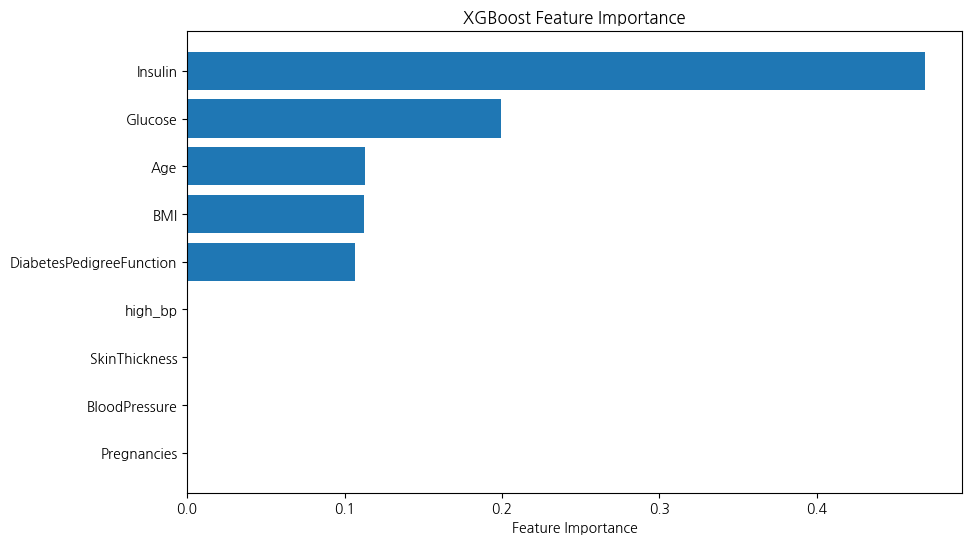

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도 시각화
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()


#### **역시나 인슐린, 글루코스, BMI, Age 순으로 중요하게 학습했다.**